
# Линейная регрессия. Практическая работа

## Цель практической работы

Научиться строить модель линейной регрессии на реальных данных.

## Что входит в практическую работу


1. Загрузить данные и ознакомиться с ними.
2. Изучить данные и провести анализ.
3. Разделить данные на обучающую и тестовую выборки.
4. Реализовать построение модели с помощью  библиотеки scikit-learn.
5. Получить качество модели с помощью MSE, MAE.


## Что оценивается 

* Выполнены все этапы работы.
* Сделан вывод по результатам.
* Модель не переобучена.
* Получена модель хорошего качества.

## Как отправить работу на проверку

Скачайте файл с заданиями в материалах, откройте его через Jupyter Notebook и выполните задачи. Сохраните изменения при помощи опции Save and Checkpoint из вкладки меню File или кнопки Save and Checkpoint на панели инструментов. Отправьте через форму ниже итоговый файл Jupyter Notebook (в формате .ipynb) или ссылку на него.



## Что нужно сделать

Пусть у нас имеется некоторый набор данных `sales.csv` о продажах квартир:

- **SalePrice** (цена продажи, *зависимая переменная*).
- **GrLivArea** (наземная жилая зона).
- **OverallQuality** (общее качество).
- **GarageArea** (территория гаража).
- **SaleCondition** (условия сделки).

Реализуйте построение модели линейной регрессии на этих данных. Проверьте качество модели на обучающей и тестовой выборках с помощью MAE, MSE. Определите, что вы не переобучились.

### 1. Импорт библиотек

In [124]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

### 2. Загрузка данных

In [125]:
df = pd.read_csv('sales.csv')
df.head()

,SalePrice,GrLivArea,GarageArea,OverallQual,Street,SaleCondition
0,208500,1710,548,7,Pave,Normal
1,181500,1262,460,6,Pave,Normal
2,223500,1786,608,7,Pave,Normal
3,140000,1717,642,7,Pave,Abnorml
4,250000,2198,836,8,Pave,Normal


### 3. Первичный анализ

1. Проведите анализ данных, посмотрите на индивидуальные графики зависимости целевой функции и отдельной переменной. Нередко, если признаков в выборке не так много, удобно построить [sns.pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html).
2. Закодируйте категориальные признаки (например, с помощью [pd.get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)).
3. Подумайте, можно ли здесь создать дополнительные переменные из имеющихся.
4. Сделайте предварительные выводы.

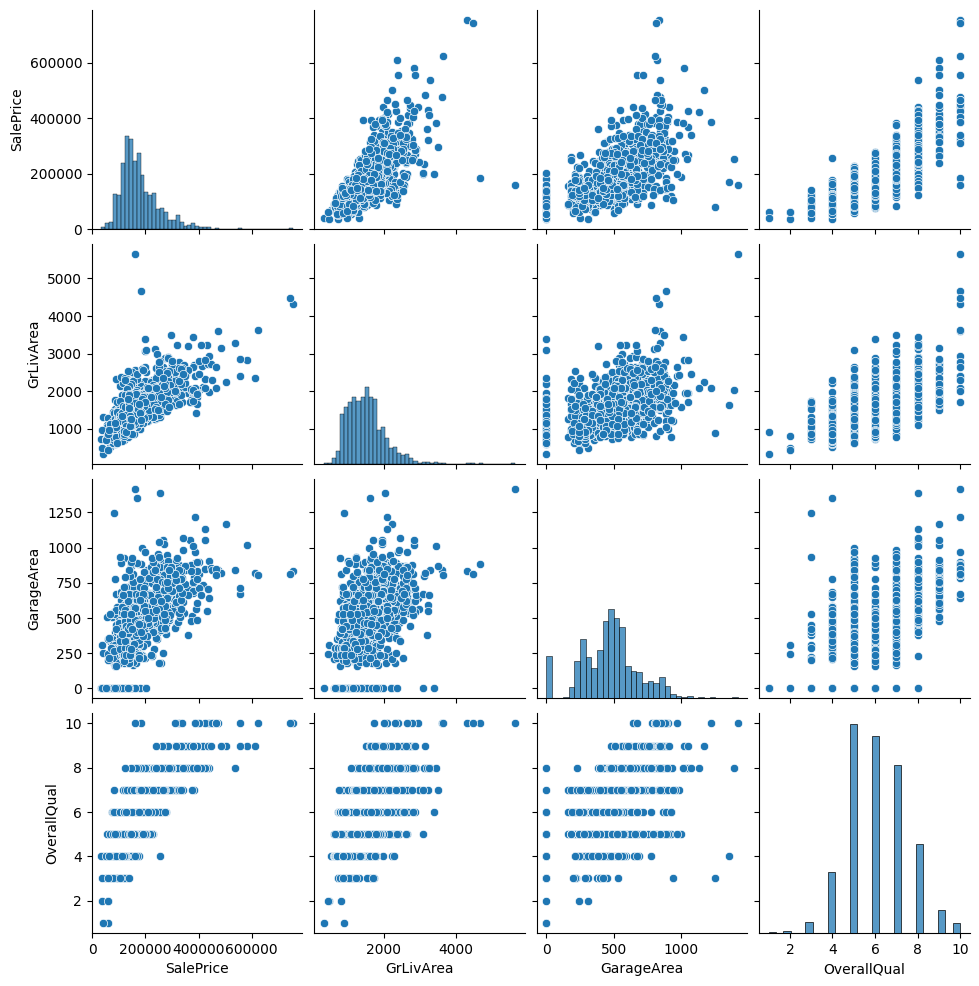

In [126]:
sns.pairplot(df)

In [127]:
df = pd.concat([df.drop(['Street', 'SaleCondition'], axis=1), 
                pd.get_dummies(df['Street']).astype(int).iloc[:, :-1], 
                pd.get_dummies(df['SaleCondition']).astype(int).iloc[:, :-1]], axis=1)
df.head()

,SalePrice,GrLivArea,GarageArea,OverallQual,Grvl,Abnorml,AdjLand,Alloca,Family,Normal
0,208500,1710,548,7,0,0,0,0,0,1
1,181500,1262,460,6,0,0,0,0,0,1
2,223500,1786,608,7,0,0,0,0,0,1
3,140000,1717,642,7,0,1,0,0,0,0
4,250000,2198,836,8,0,0,0,0,0,1


In [128]:
cm =  df.corr()
cm

,SalePrice,GrLivArea,GarageArea,OverallQual,Grvl,Abnorml,AdjLand,Alloca,Family,Normal
SalePrice,1.000000,0.708624,0.623431,0.790982,-0.041036,-0.118069,-0.050686,-0.015525,-0.046480,-0.153990
GrLivArea,0.708624,1.000000,0.468997,0.593007,-0.044121,-0.041173,-0.040208,0.032283,-0.007743,-0.091572
GarageArea,0.623431,0.468997,1.000000,0.562022,0.047794,-0.096837,-0.101277,-0.005458,-0.016173,-0.130874
OverallQual,0.790982,0.593007,0.562022,1.000000,-0.058823,-0.103535,-0.041677,-0.044950,-0.025515,-0.143282
Grvl,-0.041036,-0.044121,0.047794,-0.058823,1.000000,-0.017512,-0.003367,0.112734,-0.007571,0.002140
Abnorml,-0.118069,-0.041173,-0.096837,-0.103535,-0.017512,1.000000,-0.014289,-0.024817,-0.032128,-0.582947
AdjLand,-0.050686,-0.040208,-0.101277,-0.041677,-0.003367,-0.014289,1.000000,-0.004772,-0.006177,-0.112080
Alloca,-0.015525,0.032283,-0.005458,-0.044950,0.112734,-0.024817,-0.004772,1.000000,-0.010729,-0.194663
Family,-0.046480,-0.007743,-0.016173,-0.025515,-0.007571,-0.032128,-0.006177,-0.010729,1.000000,-0.252006
Normal,-0.153990,-0.091572,-0.130874,-0.143282,0.002140,-0.582947,-0.112080,-0.194663,-0.252006,1.000000


Вероятно, новые признаки, независящие от существующих выделить не получится.

Сильнее всего коррелируют с целевой переменной значения общего качества, площади жилья и площади гаража.

Имеющиеся категориальные (бинарные) признаки коррелируют не сильно и со знаком минус, потому их можно не учитывать (или учитывать только те, у которых корреляция по модулю > 0.1).

In [129]:
df = df.drop(cm.loc[cm['SalePrice'].abs() < 0.1, ['SalePrice']].index, axis=1)
df

,SalePrice,GrLivArea,GarageArea,OverallQual,Abnorml,Normal
0,208500,1710,548,7,0,1
1,181500,1262,460,6,0,1
2,223500,1786,608,7,0,1
3,140000,1717,642,7,1,0
4,250000,2198,836,8,0,1
...,...,...,...,...,...,...
1455,175000,1647,460,6,0,1
1456,210000,2073,500,6,0,1
1457,266500,2340,252,7,0,1
1458,142125,1078,240,5,0,1


### 4. Разделение на обучающую и тестовую выборки

In [130]:
train, test = train_test_split(df, test_size=0.25, random_state=42)
x_train, y_train = train.drop('SalePrice', axis=1), train['SalePrice']
x_test, y_test = test.drop('SalePrice', axis=1), test['SalePrice']

### 5. Обучение модели линейной регрессии

Дополнительно можно взглянуть на коэффициенты и смещение обученной модели.

In [131]:
lnr = LinearRegression()
lnr.fit(x_train, y_train)

print(lnr.intercept_)
print(lnr.coef_)

-71701.13635405916
[    46.08481684     71.41573521  27094.25601264 -26209.1363906
 -18856.01366857]


### 6. Получение предсказаний для обучающей и тестовой выборок

In [132]:
y_train_pred = lnr.predict(x_train)
y_test_pred = lnr.predict(x_test)

### 7. Проверка предсказаний

1. Проверьте качество модели на обучающей и тестовой выборках с помощью MAE, MSE.
2. Постройте диаграмму рассеяния целевой и предсказанной переменных. 

In [133]:
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f'Train MAE: {train_mae}, test MAE: {test_mae}')
print(f'Train MSE: {train_mse}, test MSE: {test_mse}')

Train MAE: 26580.353634590807, test MAE: 26461.241788578052
Train MSE: 1617913654.632538, test MSE: 1604879395.5931954


Значения ошибок незначительно отличаются, следовательно модель не переобучилась

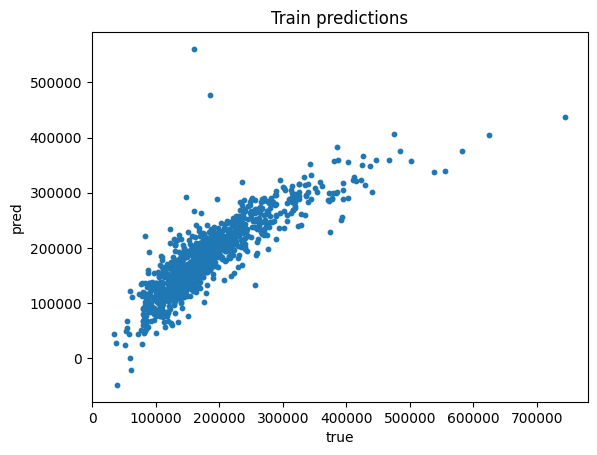

In [134]:
plt.scatter(y_train, y_train_pred, s=10)
plt.title('Train predictions')
plt.xlabel('true')
plt.ylabel('pred')
plt.show()

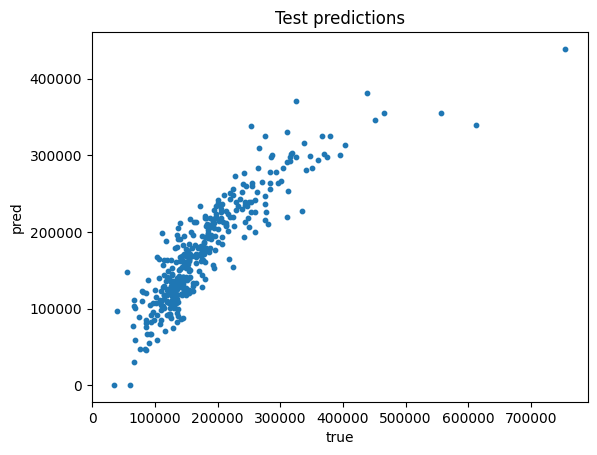

In [135]:
plt.scatter(y_test, y_test_pred, s=10)
plt.title('Test predictions')
plt.xlabel('true')
plt.ylabel('pred')
plt.show()